In [1]:
import pandas as pd
import numpy as np
import glob
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data collection

### Load all participants data 

In [2]:
#Read data from path
data_path = r"m:/pc/downloads/EyeT/EyeT/EyeT_group_dataset_III_image_name_letter_card_participant_*_trial_*.csv"
#Get files with same pattern
All_files = glob.glob(data_path)
#Define list
df_pre = []
#Concatenate all files
for file in All_files:
    df_pre.append(pd.read_csv(file))
emp_data = pd.concat(df_pre, ignore_index=True)

I used the glob function to combine the data from all 60 participants into a single DataFrame after loading the eye-tracking data from CSV files.

In [3]:
#Check dimension of data
emp_data.shape

(3776742, 71)

In [4]:
emp_data.head()

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,3082,23419315,512092386,NaN,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
1,3083,23419315,512092386,NaN,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
2,3084,23426120,512099191,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
3,3085,23434449,512107520,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
4,3086,23442782,512115853,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN


### Load Questionaire data

In [5]:
#Read Questionaire data
qr_df = pd.read_csv(r"m:/pc/downloads/Questionnaire_datasetIB.csv", encoding= 'unicode_escape')

In [6]:
qr_df.head()

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time
0,1,9534500,24.09.2020 16:00,24.09.2020 16:00,Yes,Proceed,1,3,4,4,...,1,4,4,4,1,2,4,137,109,5 minutes 5 seconds
1,2,9597659,30.09.2020 15:14,30.09.2020 15:14,Yes,Proceed,2,2,4,4,...,2,4,3,3,4,2,2,127,100,5 minutes 55 seconds
2,3,9637453,01.10.2020 16:20,01.10.2020 16:20,Yes,Proceed,4,1,4,4,...,3,3,3,2,3,3,2,123,98,6 minutes 49 seconds
3,4,9732460,06.10.2020 16:45,06.10.2020 16:45,Yes,Proceed,2,3,3,3,...,2,3,4,3,2,4,2,120,95,8 minutes 39 seconds
4,5,9732853,06.10.2020 17:24,06.10.2020 17:24,Yes,Proceed,2,3,4,3,...,3,4,2,1,4,3,4,124,97,7 minutes 27 seconds


## Data Preprocessing

In [7]:
#Check information of dataset
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3776742 entries, 0 to 3776741
Data columns (total 71 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Unnamed: 0                           int64  
 1   Recording timestamp                  int64  
 2   Computer timestamp                   int64  
 3   Sensor                               object 
 4   Project name                         object 
 5   Export date                          object 
 6   Participant name                     object 
 7   Recording name                       object 
 8   Recording date                       object 
 9   Recording date UTC                   object 
 10  Recording start time                 object 
 11  Recording start time UTC             object 
 12  Recording duration                   int64  
 13  Timeline name                        object 
 14  Recording Fixation filter name       object 
 15  Recording software version      

Observation:
The dataset contains 3776742 rows and 71 columns. 

In [8]:
#Check null values
empty_values_count = emp_data.isnull().sum()
print(empty_values_count)

Unnamed: 0                          0
Recording timestamp                 0
Computer timestamp                  0
Sensor                           2035
Project name                        0
                               ...   
Fixation point Y              1819701
Fixation point X (MCSnorm)    2006830
Fixation point Y (MCSnorm)    2006830
Mouse position X              3737573
Mouse position Y              3737573
Length: 71, dtype: int64


In [9]:
#Function to remove columns with more than 75% of missing values
def columns_removal(df, threshold):
    thres = int(threshold * len(df))
    df = df.dropna(thresh=thres, axis=1)
    return df
emp_data = columns_removal(emp_data,0.75)

Columns having more than 75% missing values are to be dropped as any type of imputation would not be efficient.

In [10]:
#Removing columns having duplicate values
def unique_val_cols(df):
    columns_to_keep = df.columns[df.nunique() > 1]
    df = df[columns_to_keep]
    return df
emp_data = unique_val_cols(emp_data)

Dropping the duplicated values, so as to achieve accurate modelling results.

In [11]:
#Function to replace comma in dataset to dot and type casting object datapoints into numerica datapoints
def numeric_conversion_optimized(df):
    df = df.replace(',', '.', regex=True)
    df = df.apply(pd.to_numeric, errors='ignore')
    return df
emp_data = numeric_conversion_optimized(emp_data)

In [12]:
missing_val_columns = ['Gaze point X (MCSnorm)','Gaze point Y (MCSnorm)','Gaze direction right Y','Gaze direction left Z','Gaze direction right Z',
                       'Gaze point right X (DACSmm)','Gaze point right Y (DACSmm)','Eye position right Z (DACSmm)','Eye position right Y (DACSmm)',
                       'Eye position right X (DACSmm)']
#Function to impute the missing values on the Dataset using K-Nearest Algorithm
def missing_val_imputation(df, missing_val_columns):
    imputer = IterativeImputer()
    df[missing_val_columns] = imputer.fit_transform(df[missing_val_columns])
    return df

emp_data = missing_val_imputation(emp_data, missing_val_columns)

Columns having less than 75% missing values are imputed using the Iterative imputer, as is very flexible and it can be used with a variety of estimators to do round-robin regression, treating every variable as an output in turn.

In [13]:
#Drop Unnessessary columns
remove_cols =['Timeline name', 'Export date', 'Recording date UTC', 'Recording start time', 'Presented Stimulus name', 'Original Media height', 
                      'Presented Media name', 'Recording date','Recording duration',  'Sensor', 'Recording name', 'Eye movement type index',
                       'Recording start time UTC', 'Original Media width', 'Unnamed: 0','Project name', ]

# drop the columns
emp_data = emp_data.drop(columns=remove_cols)

The columns that are irrelevant when traking Eye moments are dropped to make further implementation efficient.

In [14]:
#Merge Questionaire data with empathy dataset
def empathy_score_optimized(df, questionaire):
    #Function that adds empathy scores from questionnaire data to Dataset
    empathy_scores = questionaire.set_index('Participant nr')['Total Score extended'].to_dict()
    df['Participant name'] = df['Participant name'].str[-2:].astype(int)
    df = df.sort_values('Participant name')
    df['Empathy Score'] = df['Participant name'].map(empathy_scores).fillna(0)
    return df, empathy_scores

# Example usage
empathy_df, empathy_scores = empathy_score_optimized(emp_data, qr_df)
empathy_df = empathy_df.sort_values('Participant name')

Merging the preprocessed data with the Questionaire data for further analysis and modelling.

## Data Visualization

array([[<AxesSubplot:title={'center':'Recording timestamp'}>,
        <AxesSubplot:title={'center':'Computer timestamp'}>,
        <AxesSubplot:title={'center':'Participant name'}>,
        <AxesSubplot:title={'center':'Eyetracker timestamp'}>,
        <AxesSubplot:title={'center':'Gaze point X'}>],
       [<AxesSubplot:title={'center':'Gaze point Y'}>,
        <AxesSubplot:title={'center':'Gaze point left X'}>,
        <AxesSubplot:title={'center':'Gaze point left Y'}>,
        <AxesSubplot:title={'center':'Gaze point right X'}>,
        <AxesSubplot:title={'center':'Gaze point right Y'}>],
       [<AxesSubplot:title={'center':'Gaze direction left X'}>,
        <AxesSubplot:title={'center':'Gaze direction left Y'}>,
        <AxesSubplot:title={'center':'Gaze direction left Z'}>,
        <AxesSubplot:title={'center':'Gaze direction right X'}>,
        <AxesSubplot:title={'center':'Gaze direction right Y'}>],
       [<AxesSubplot:title={'center':'Gaze direction right Z'}>,
        <Axes

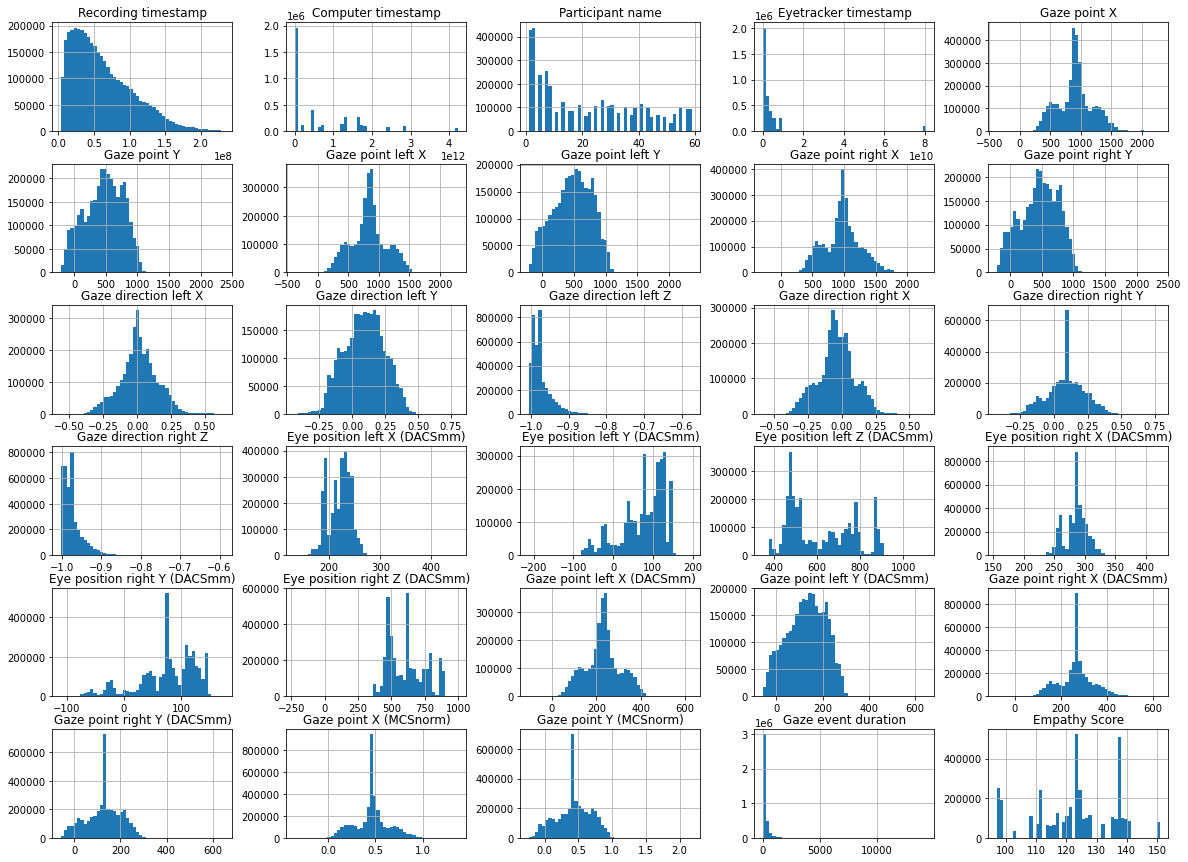

In [15]:
#Plot histogram
empathy_df.hist(bins=50, figsize=(20,15))

Observation:

Most of the columns are normally distributed. Some columns (Gaze direction Z,etc) are right skewed. Having normally distributed data is advantageous for modelling.

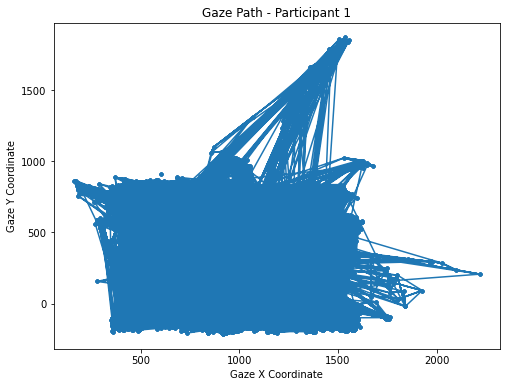

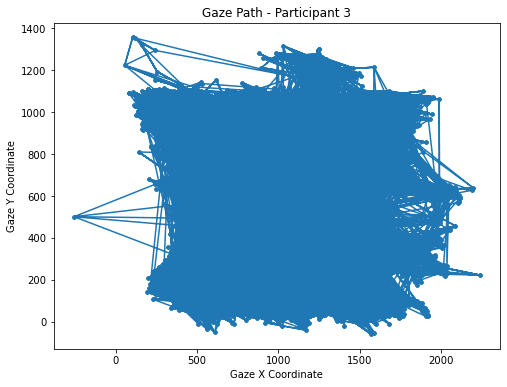

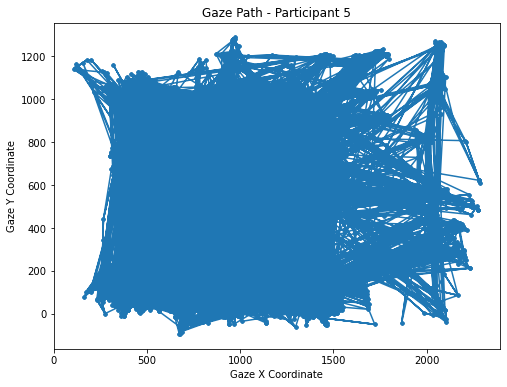

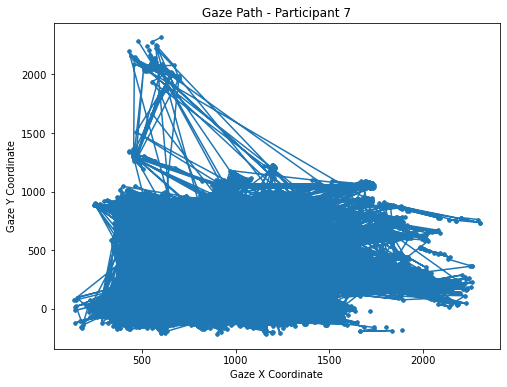

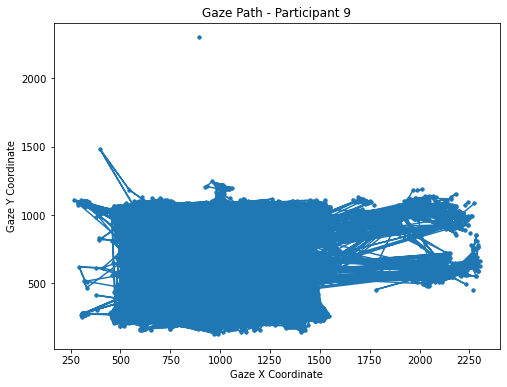

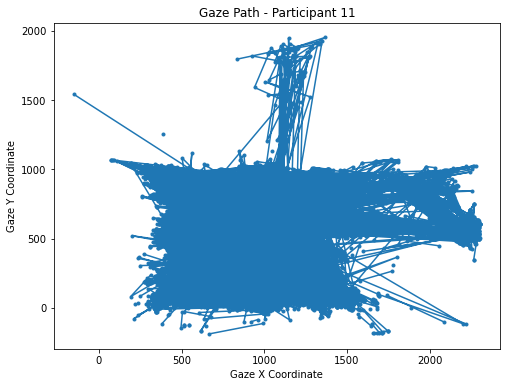

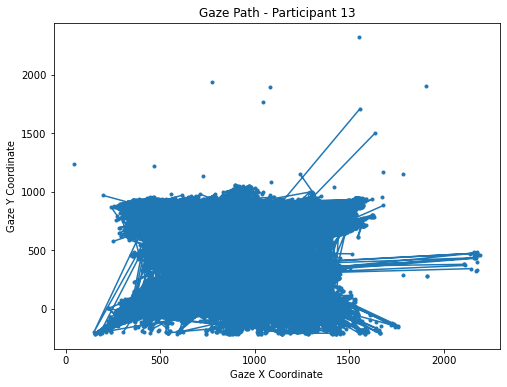

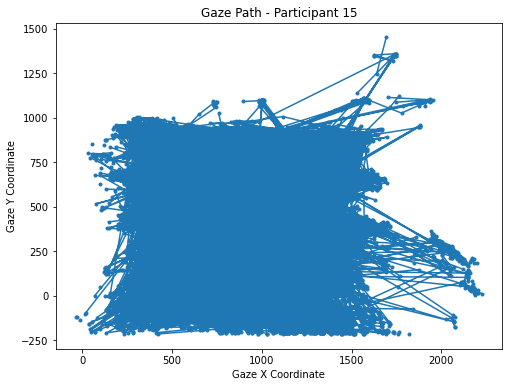

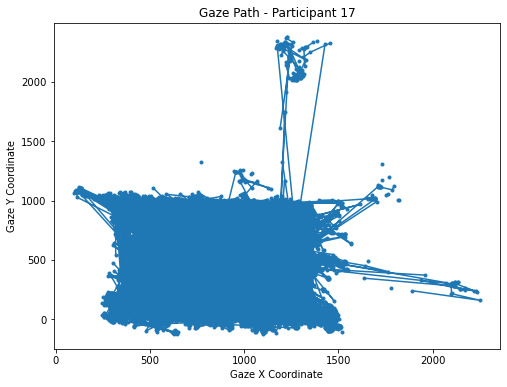

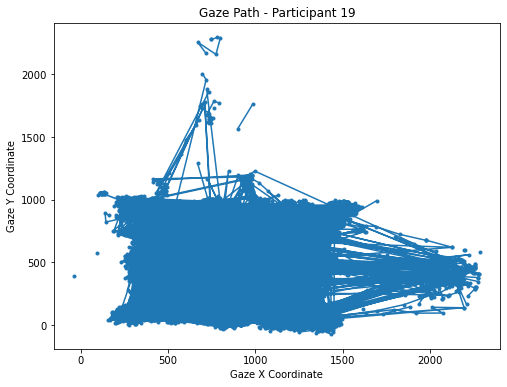

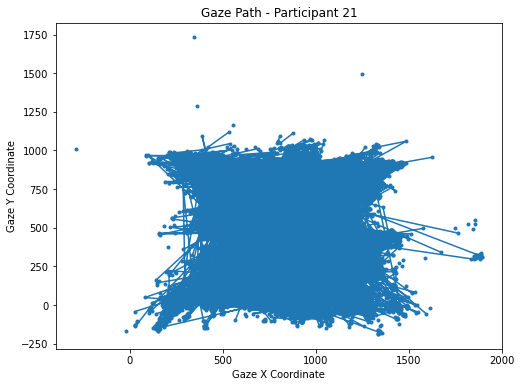

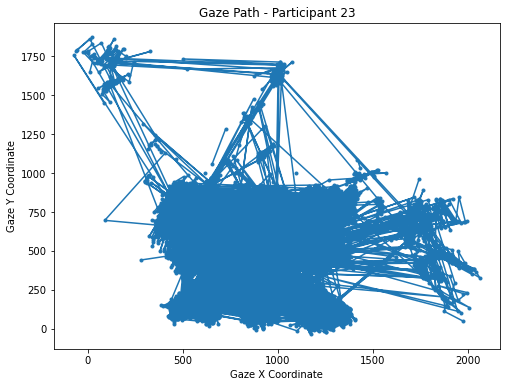

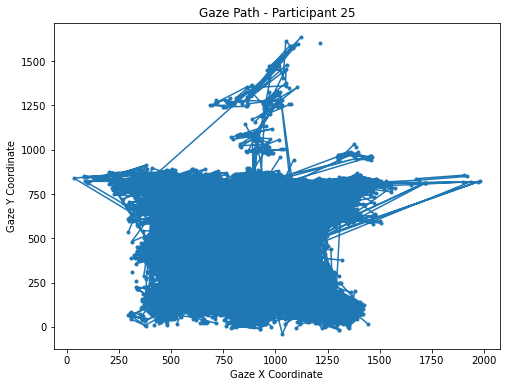

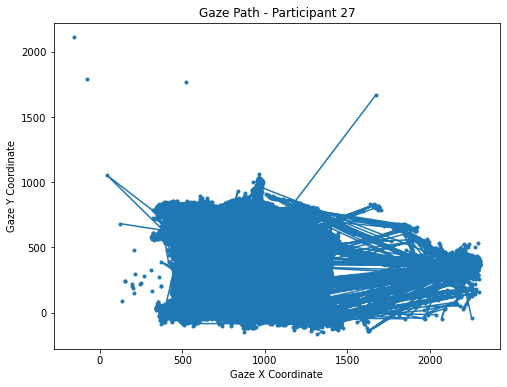

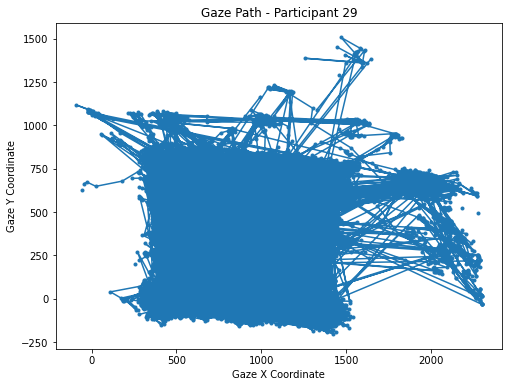

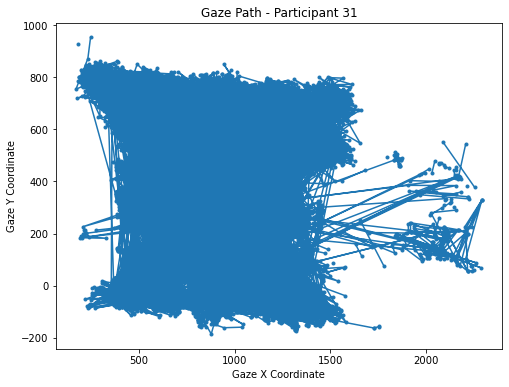

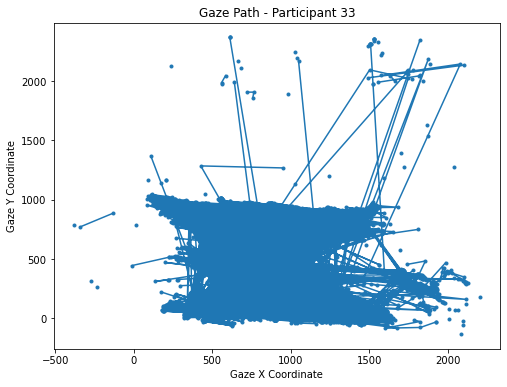

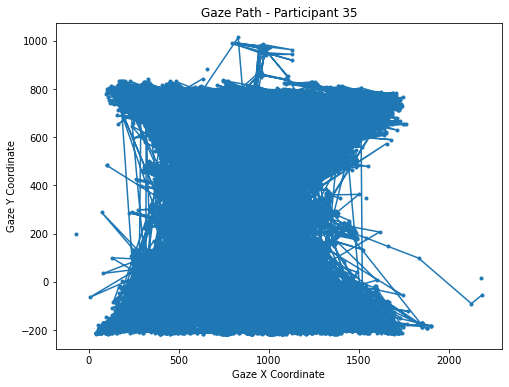

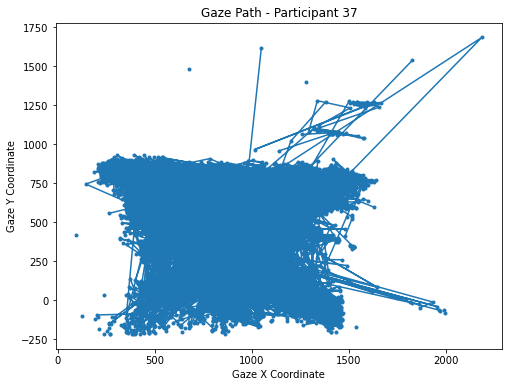

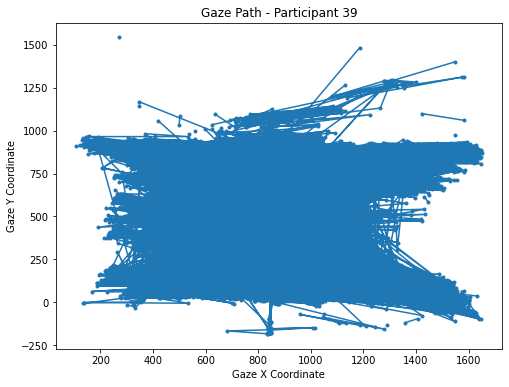

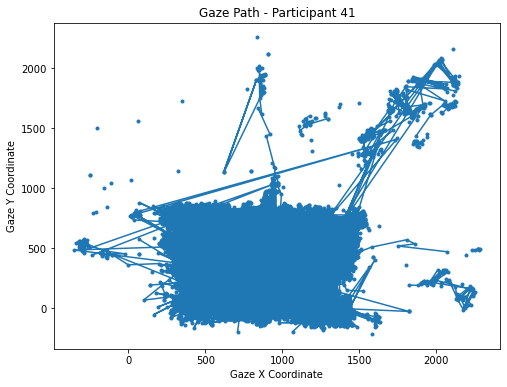

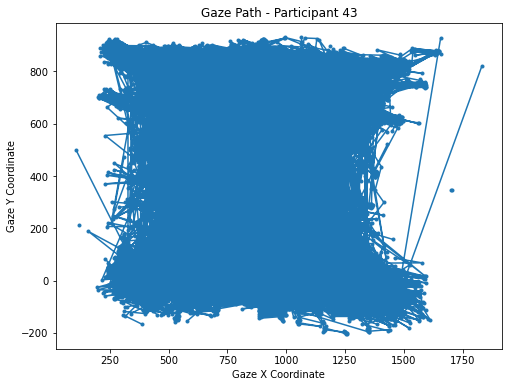

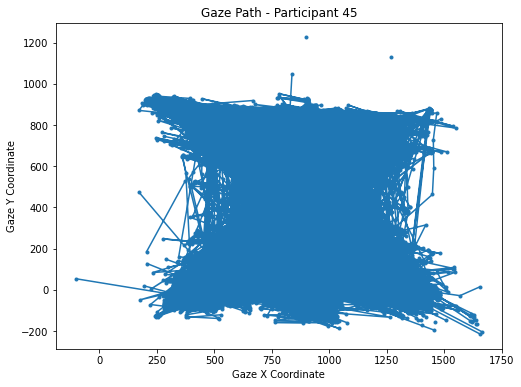

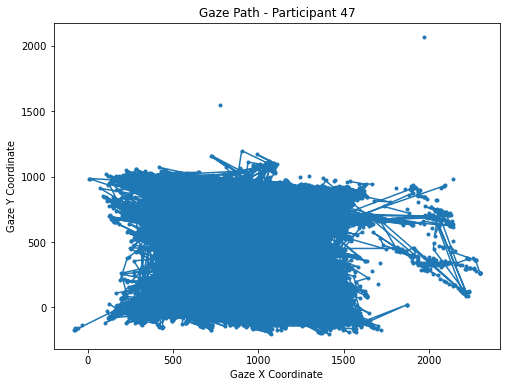

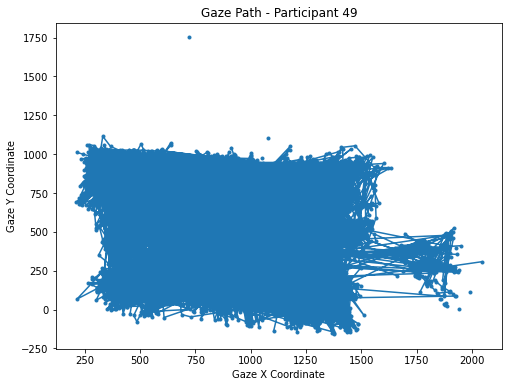

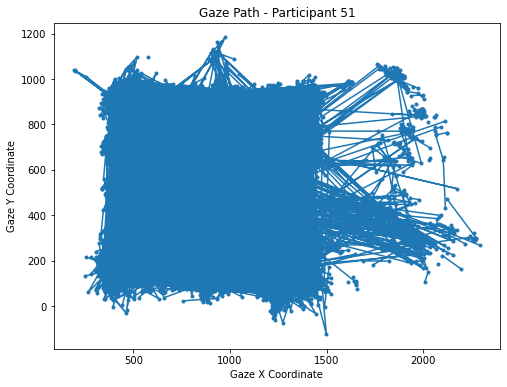

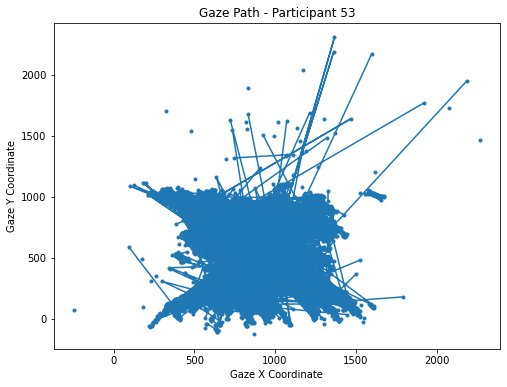

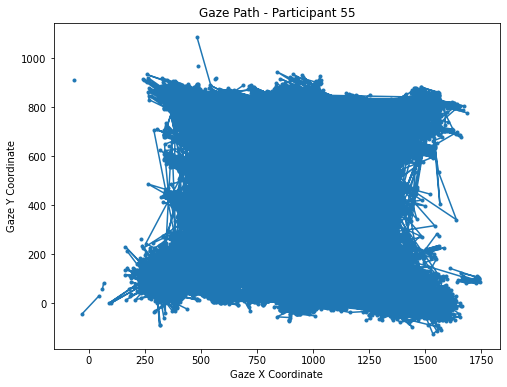

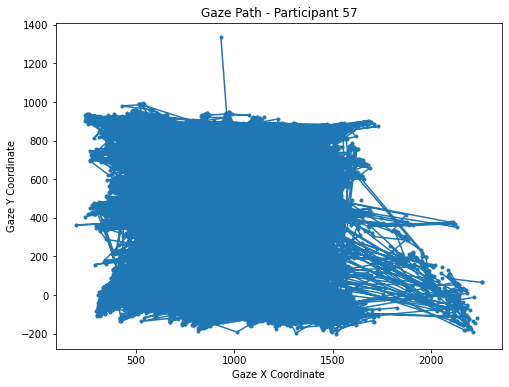

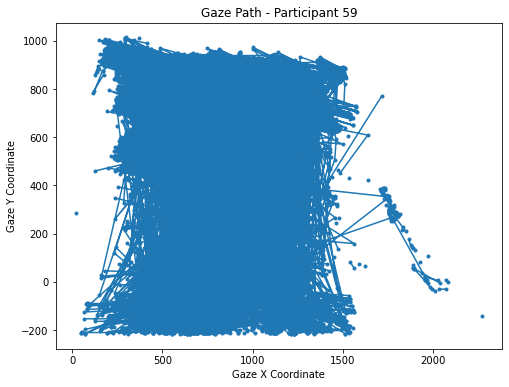

In [16]:
# Get a list of unique participant IDs
participant_ids = empathy_df['Participant name'].unique()

# Iterate through each participant
for participant_id in participant_ids:
    # Extract data for the current participant
    participant_data = empathy_df[empathy_df['Participant name'] == participant_id]
    
    # Example 1: Gaze Path Plot
    plt.figure(figsize=(8, 6))
    plt.plot(participant_data['Gaze point X'], participant_data['Gaze point Y'], '-o', markersize=3)
    plt.title(f'Gaze Path - Participant {participant_id}')
    plt.xlabel('Gaze X Coordinate')
    plt.ylabel('Gaze Y Coordinate')
    plt.show()

In [17]:
# Resetting index
empathy_df = empathy_df.reset_index(drop=True)

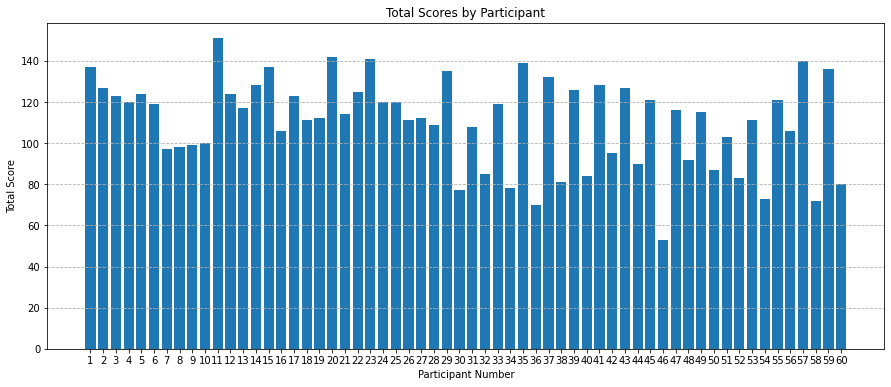

In [18]:
# Grouping the questionnaire data by Participant nr and summing their scores
participant_scores = qr_df.groupby('Participant nr')['Total Score extended'].sum().reset_index()

# Plotting the bar graph
plt.figure(figsize=(15, 6))
plt.bar(participant_scores['Participant nr'], participant_scores['Total Score extended'])
plt.title('Total Scores by Participant')
plt.xlabel('Participant Number')
plt.ylabel('Total Score')
plt.xticks(participant_scores['Participant nr'])
plt.grid(axis='y', linestyle='--')
plt.show()

Observing the total score of all trails of each participant. Participant 11 has the highest score when compared to all other participants

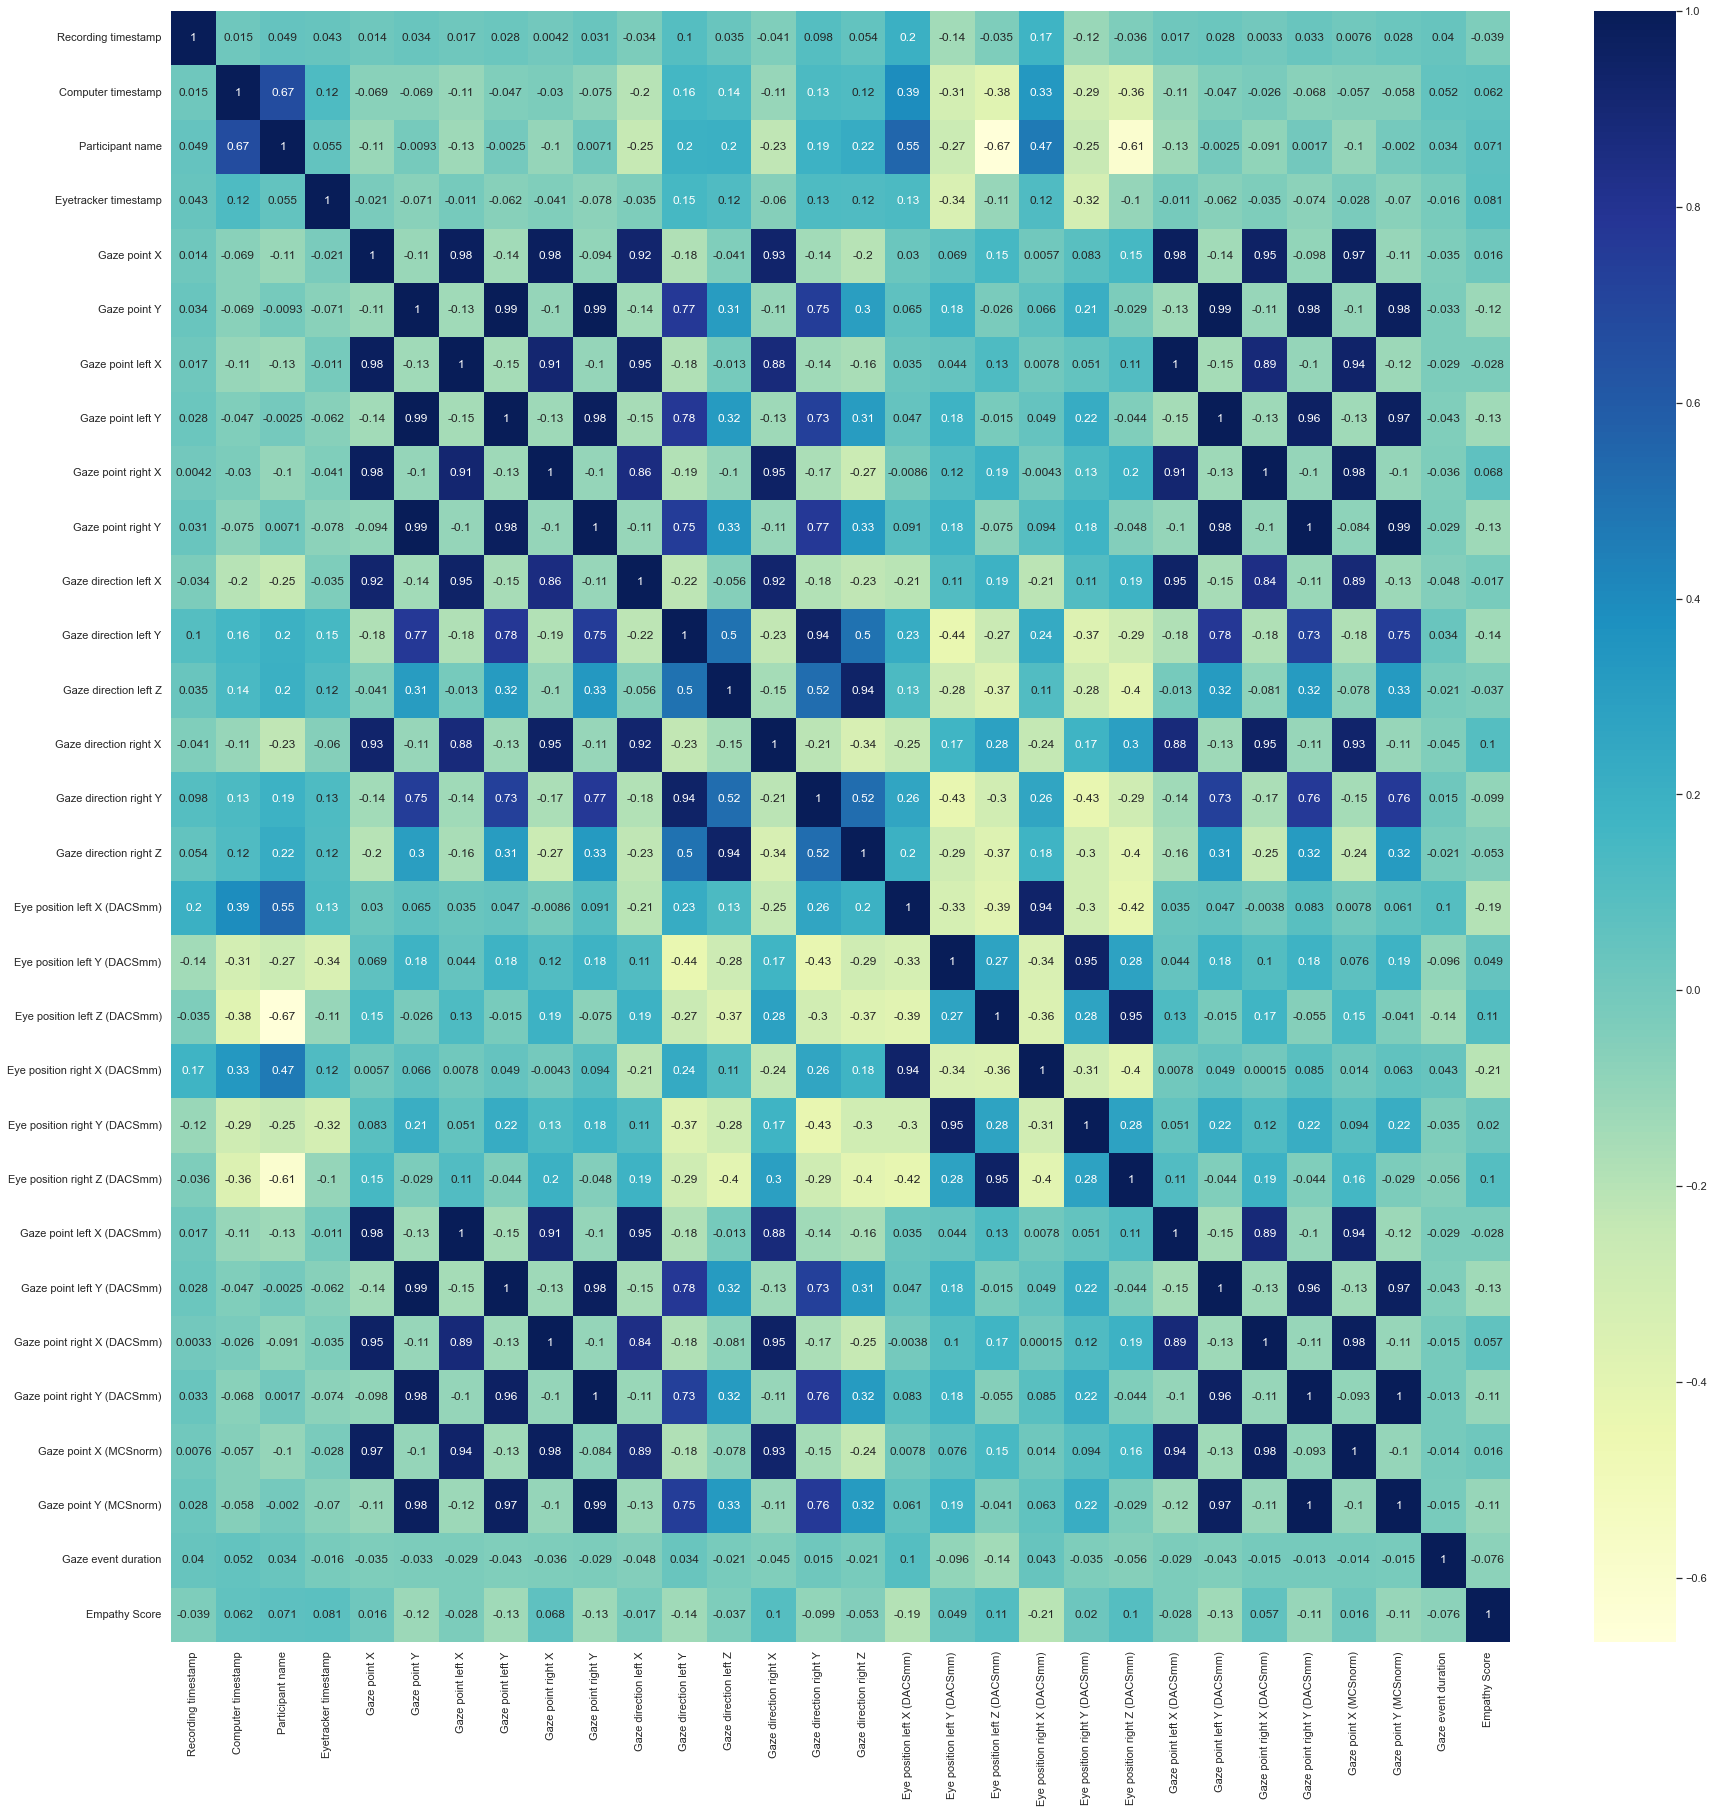

In [19]:
# Ploting the correlation heatmap
corr = empathy_df.corr()
sns.set(style='white')
plt.figure(figsize=(30,30))
sns.heatmap(empathy_df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [20]:
# Dropping columns with high correlation
threshold = 0.9
columns_to_drop = []
for i in range(len(corr.columns)):
    for j in range(i + 1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > threshold:
            colname = corr.columns[i]
            if colname not in columns_to_drop:
                columns_to_drop.append(colname)
print(columns_to_drop)

['Gaze point X', 'Gaze point Y', 'Gaze point left X', 'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y', 'Gaze direction left X', 'Gaze direction left Y', 'Gaze direction left Z', 'Gaze direction right X', 'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)', 'Gaze point left X (DACSmm)', 'Gaze point left Y (DACSmm)', 'Gaze point right X (DACSmm)', 'Gaze point right Y (DACSmm)']


The columns shown above have high collinearity (more thamn 0.9). These columns effect the performance of the model, therefore, droppoing these columns is the best option.

In [21]:
empathy_df_filtered = empathy_df.drop(columns=columns_to_drop)

In [22]:
empathy_df_filtered.isna().sum()

Recording timestamp                  0
Computer timestamp                   0
Participant name                     0
Eyetracker timestamp             41204
Gaze direction right Y               0
Gaze direction right Z               0
Validity left                    41204
Validity right                   41204
Eye position right X (DACSmm)        0
Eye position right Y (DACSmm)        0
Eye position right Z (DACSmm)        0
Gaze point X (MCSnorm)               0
Gaze point Y (MCSnorm)               0
Eye movement type                  634
Gaze event duration                634
Empathy Score                        0
dtype: int64

In [23]:
empathy_df_filtered.dropna(inplace=True)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert object columns to float using label encoding
for col in ['Validity left', 'Validity right', 'Eye movement type']:
    empathy_df_filtered[col] = label_encoder.fit_transform(empathy_df_filtered[col]).astype(float)

Encoding Categorical Variables

To prepare the data for machine learning models, we encode categorical variables using Label Encoding.

## Splitting data into Train and Test set for Time series Analysis 

In [24]:
# Sort the data by the time column
data_sorted = empathy_df_filtered.sort_values(by='Recording timestamp')

# Define the percentage of data to be used for testing
test_size = 0.2  # You can adjust this based on your preference

# Split the data into training and testing sets
train_data, test_data = train_test_split(data_sorted, test_size=test_size, shuffle=False)

# Separate the features (X) and target variable (y) in the training and testing sets
X_train = train_data.drop(columns=['Empathy Score'])
y_train = train_data['Empathy Score']

X_test = test_data.drop(columns=['Empathy Score'])
y_test = test_data['Empathy Score']

# Standard scalar

In [25]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Each feature or variable is scaled to unit variance once the mean has been removed by StandardScaler. This process is carried out independently based on feature. Since StandardScaler involves the estimation of the empirical mean and standard deviation of each feature, outliers can have an impact on it (if they are present in the dataset).

# Linear Regression

In [26]:
# Initialize lists to store results for each fold
mse_scores = []

# Initialize the Linear Regression model
model = LinearRegression()
    
# Fit the model on the training data
model.fit(X_train, y_train)
    
# Make predictions on the test data
y_pred = model.predict(X_test)
    
# Calculate Mean Squared Error (MSE) for this fold and store it in the list
mse = mean_squared_error(y_test, y_pred)
mse_scores.append(mse)
print(f"MSE: {mse}")

MSE: 154.49730454983387


In [27]:
# Get the predicted scores from the model
y_pred = model.predict(X_test)

# Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)

R-squared: 0.12862493705626077
Mean Absolute Error: 9.72216551044156


The Linear regression model did not perform well.  R square value of 0.129 indicates that the linear regression model explains about 12.9% of the variability in the target variable. 

MAE of 9.722 suggests that, on average, the model's predictions deviate from the actual values by around 9.722 units.

MSE value of 154.497 indicates that, on average, the squared differences between the predicted and actual values are around 154.497 units.

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.13011290067834905
R-squared: 0.9992661545950673
Mean Absolute Error: 0.009570236163981644


The Random Forest model performed well, but it might be overfitting.
MSE value of approximately 0.130 suggests that, on average, the squared differences between the predicted and actual values are quite low, indicating that the model's predictions are close to the true values.

R-squared value of approximately 0.999 indicates an extremely high fit of the model to the data.

MAE value of approximately 0.00957 is also extremely low.

# gradient boosting

In [29]:
# Create a Gradient Boosting Regressor object
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 6.473971709957861
R-squared: 0.9634863694049698
Mean Absolute Error: 1.3869952324119665


The Gradient Boosting model performed well having a good fit.
MSE value of 6.479 indicates the average of the squared differences between the predicted and actual values. 

R-squared value of 0.963 indicates that around 96.3% of the variance in the dependent variable is explained by the independent variables in the Gradient Boosting model.

MAE value of 1.388 suggests that, on average, the model's predictions deviate from the actual values by about 1.388 units.